### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset into dataframe.

In [73]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('HousingData.csv')
df.shape

(506, 14)

In [18]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [20]:
df = df.dropna()
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

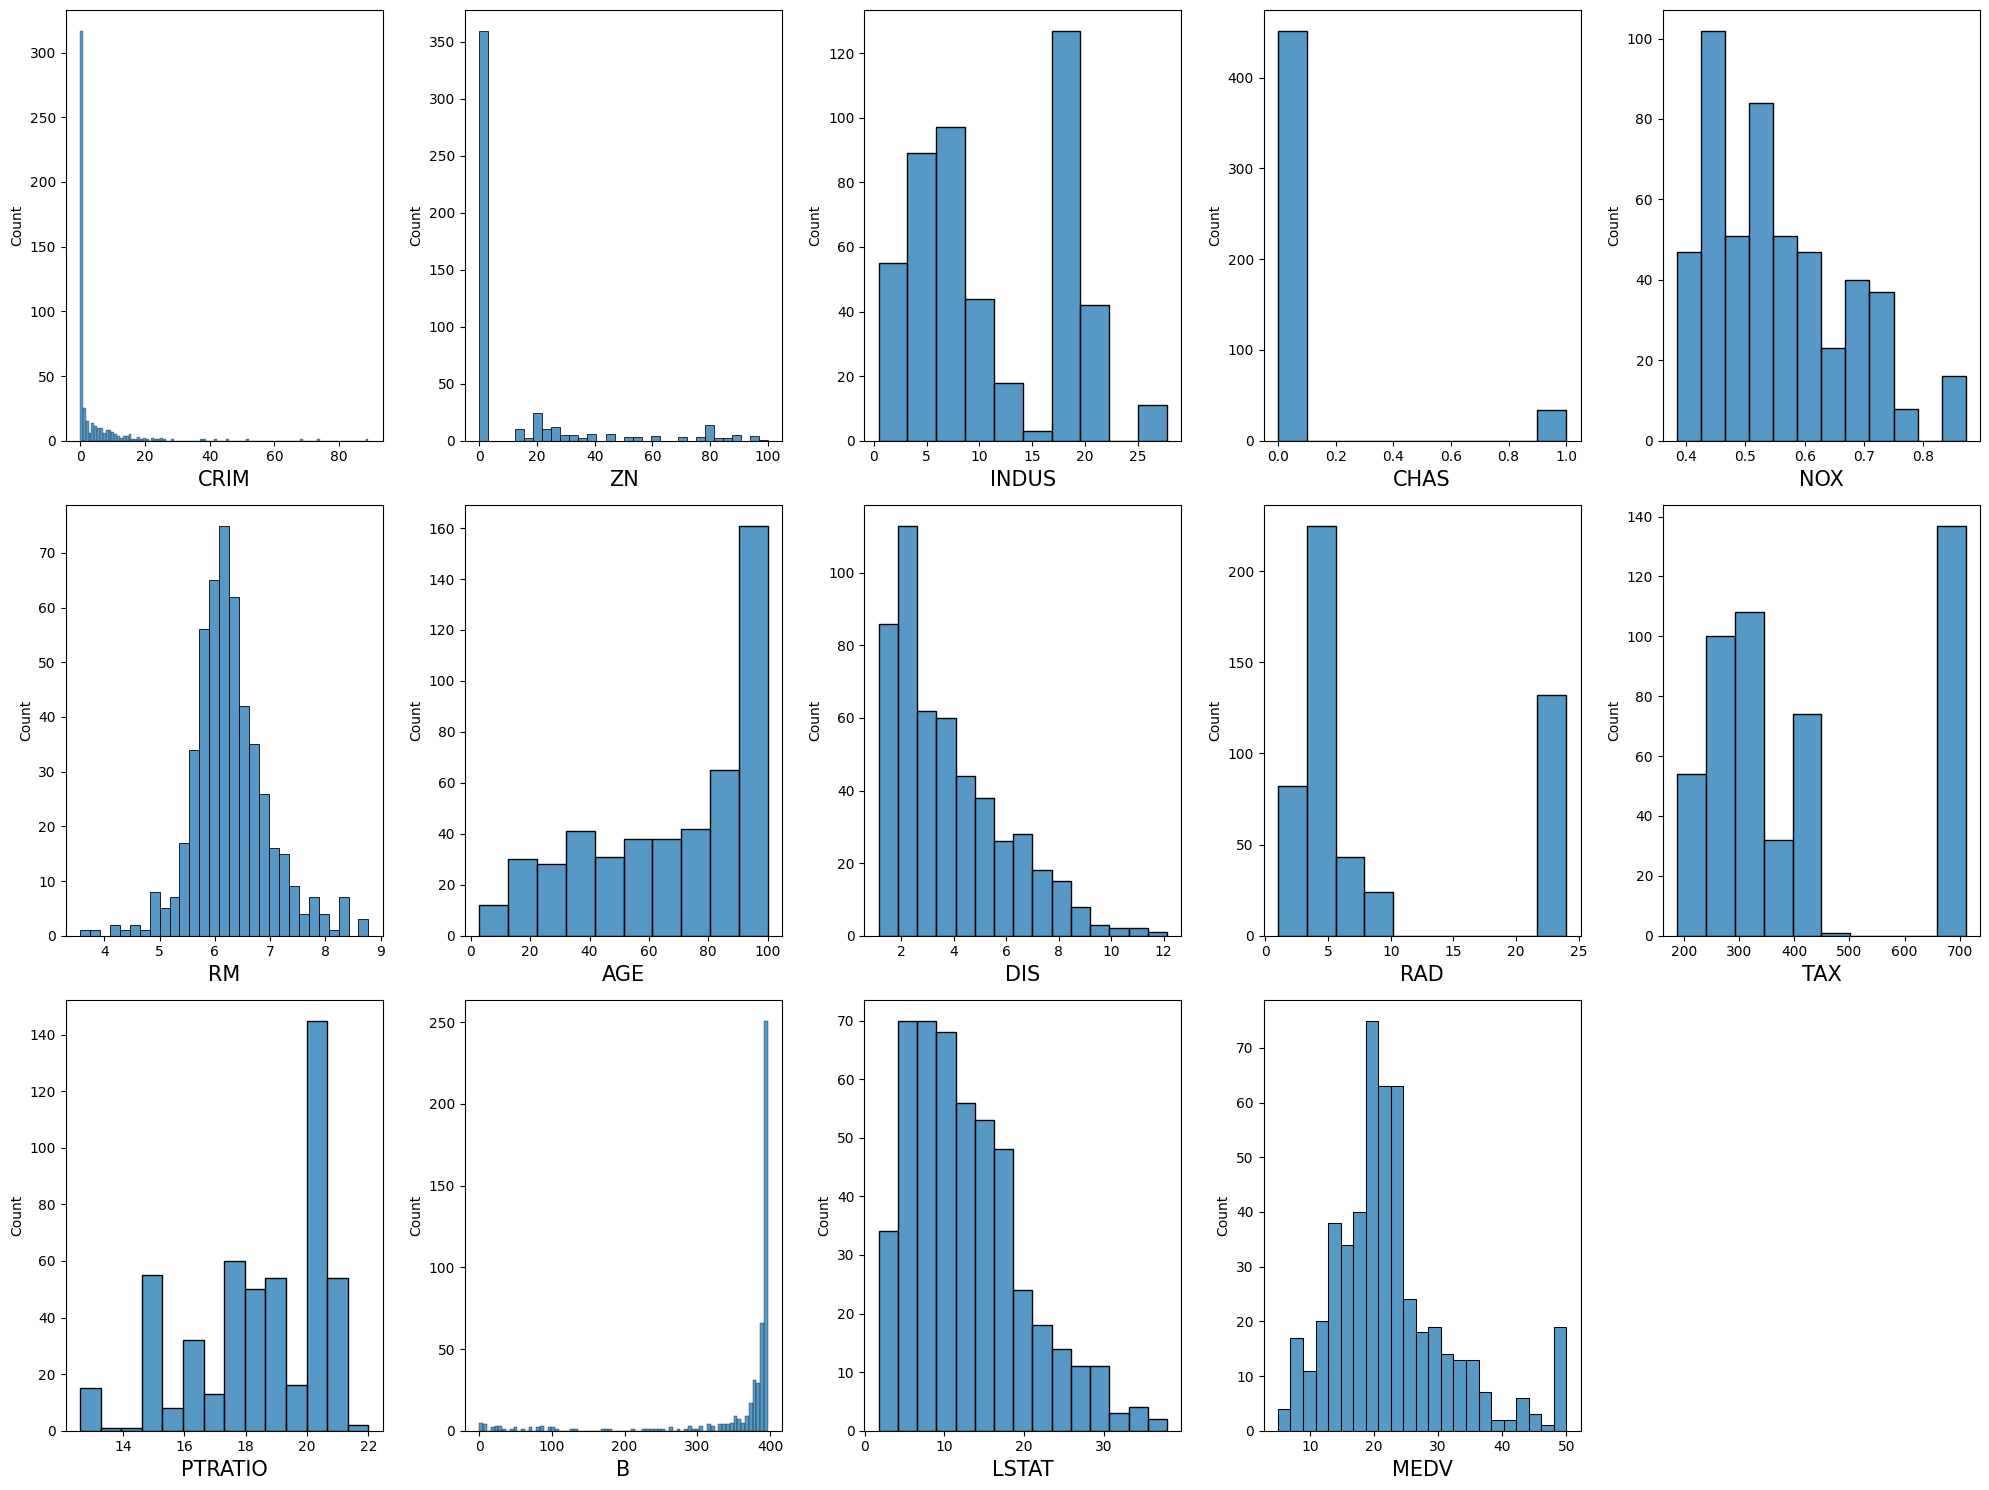

In [70]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

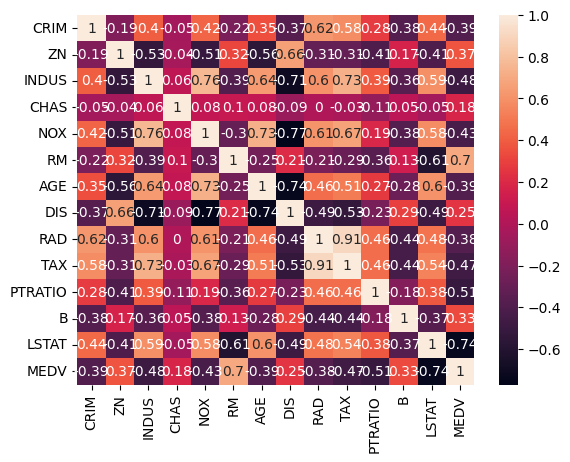

In [71]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [28]:
X = df.drop(columns = ['MEDV'])
Y = df['MEDV']

In [29]:
from sklearn.model_selection import train_test_split
 
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size =0.2)
  
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (315, 13)
xtest shape  :  (79, 13)
ytrain shape :  (315,)
ytest shape  :  (79,)


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

print(xtrain.shape, "  ==  ", ytrain.shape)

(315, 13)   ==   (315,)


In [46]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)
  
y_pred = reg.predict(xtest)

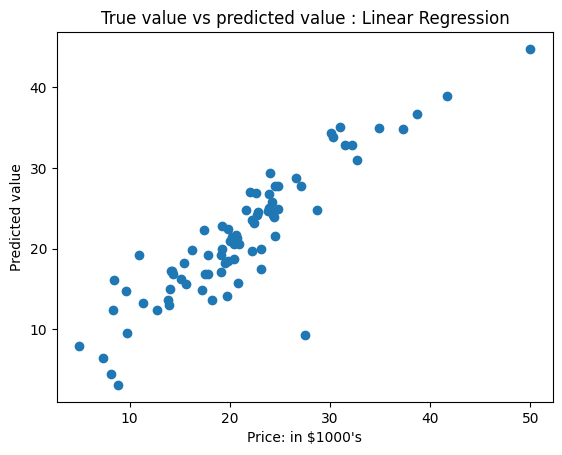

In [47]:
 
plt.scatter(ytest, y_pred)
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [48]:
 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
print('MSE:', metrics.mean_squared_error(ytest, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

MAE: 2.614337320554475
MSE: 13.354606894023874
RMSE: 3.6543955579580976


In [40]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [62]:
# Print the intercept
print(f'Intercept: {reg.intercept_}\n')


# Print the coefficients
for feature, coef in zip(column_names, reg.coef_):
    print(f'{feature}: {coef}')

Intercept: 22.684126984126983

CRIM: -0.8565567238533583
ZN: 1.0755520512465604
INDUS: 0.31691721068771483
CHAS: 0.6908992596225559
NOX: -2.1308430400220186
RM: 3.3930067511937647
AGE: -0.3696249314415153
DIS: -3.0117364457762488
RAD: 2.449825396518166
TAX: -2.2719268058651663
PTRATIO: -2.1128937475599168
B: 0.8581479488839394
LSTAT: -2.739019211265908


In [76]:
highly_correlated = ['RM', 'RAD', 'ZN']
new_train = xtrain[:, [5, 8, 1]]
new_model = LinearRegression(new_train, ytrain)

TypeError: LinearRegression.__init__() takes 1 positional argument but 3 were given